In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import shutil 
from datetime import datetime 
import numpy as np
import copy
from hijri_converter import convert

<Figure size 720x432 with 0 Axes>

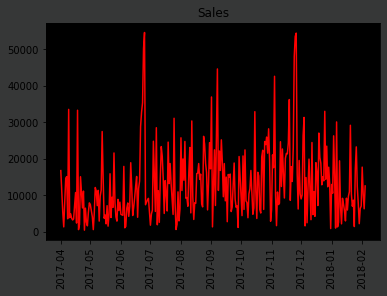

In [15]:
df = pd.read_csv('Data\multi_feature_sales_data.csv')
df["Date"] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)
plt.figure(figsize=(10,6))
fig = plt.figure()
fig.patch.set_facecolor('xkcd:dark grey')
ax = plt.axes()
ax.set_facecolor("black")
plt.plot(df.index[:300], df['Sales'][:300], color = 'red')
plt.title('Sales')
plt.xticks(rotation='vertical')
plt.show()

<Figure size 720x432 with 0 Axes>

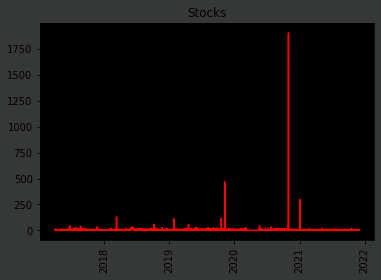

<Figure size 720x432 with 0 Axes>

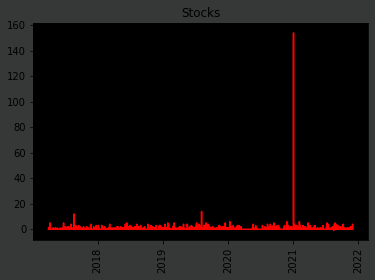

<Figure size 720x432 with 0 Axes>

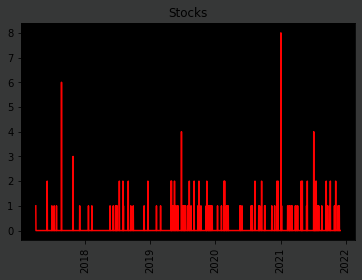

<Figure size 720x432 with 0 Axes>

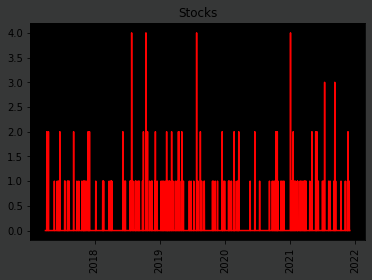

<Figure size 720x432 with 0 Axes>

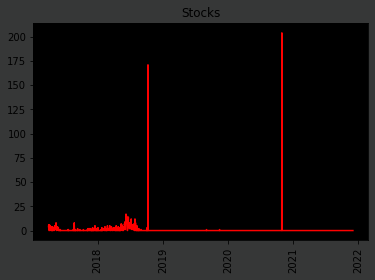

<Figure size 720x432 with 0 Axes>

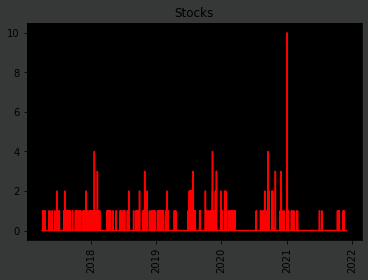

<Figure size 720x432 with 0 Axes>

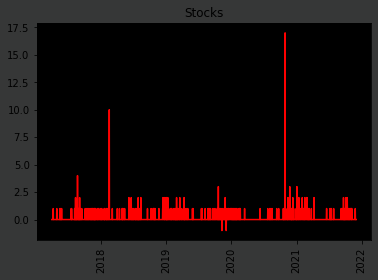

<Figure size 720x432 with 0 Axes>

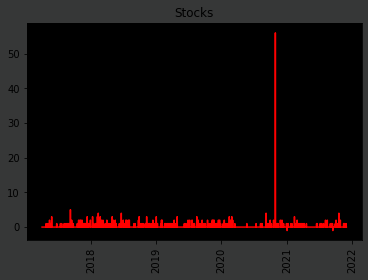

<Figure size 720x432 with 0 Axes>

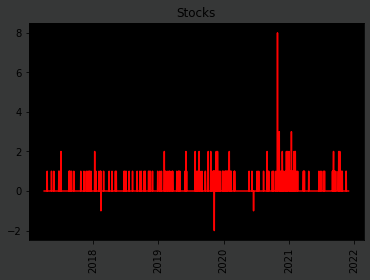

<Figure size 720x432 with 0 Axes>

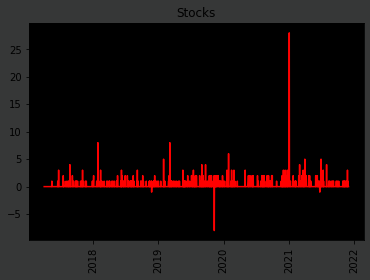

<Figure size 720x432 with 0 Axes>

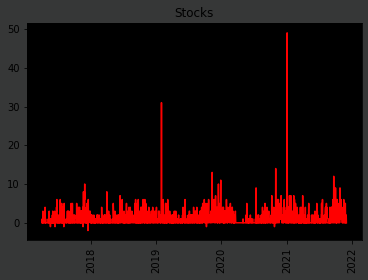

<Figure size 720x432 with 0 Axes>

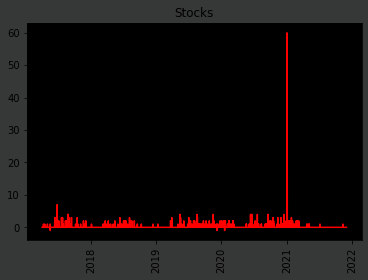

<Figure size 720x432 with 0 Axes>

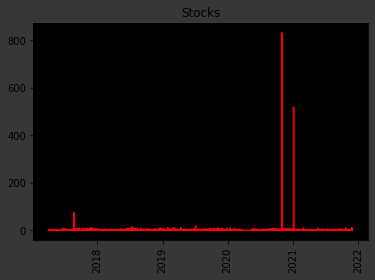

<Figure size 720x432 with 0 Axes>

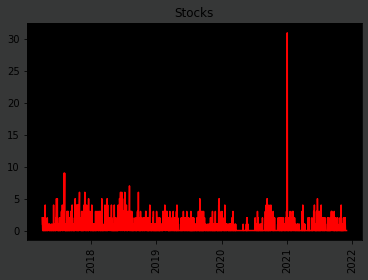

<Figure size 720x432 with 0 Axes>

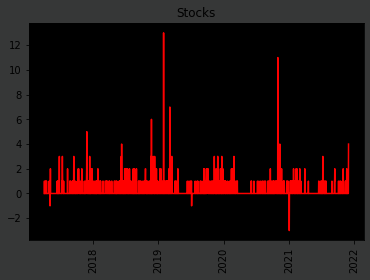

<Figure size 720x432 with 0 Axes>

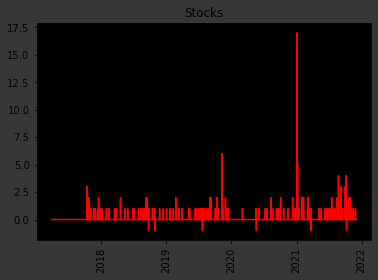

<Figure size 720x432 with 0 Axes>

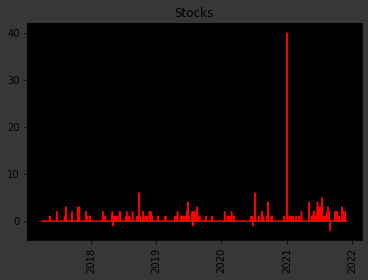

<Figure size 720x432 with 0 Axes>

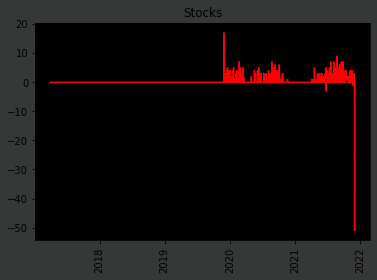

<Figure size 720x432 with 0 Axes>

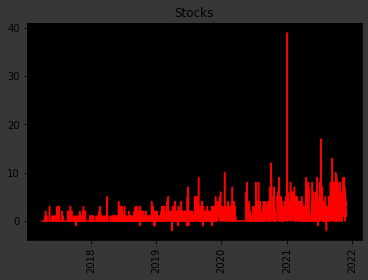

<Figure size 720x432 with 0 Axes>

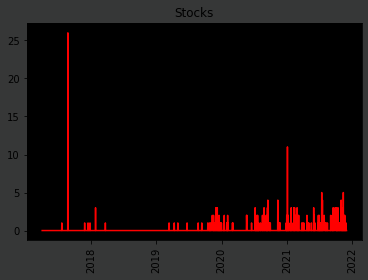

In [22]:
df_cat = pd.read_csv('..\Application\Data\Monthly_Stocks_Data\Main_Categories.csv')
df_cat['Date'] = pd.to_datetime(df_cat['Date'], dayfirst=True)
df_cat.set_index('Date', inplace = True)
for c in df_cat.columns:
    plt.figure(figsize=(10,6))
    fig = plt.figure()
    fig.patch.set_facecolor('xkcd:dark grey')
    ax = plt.axes()
    ax.set_facecolor("black")
    plt.plot(df_cat.index, df_cat[c], color = 'red')
    plt.title('Stocks')
    plt.xticks(rotation='vertical')
    plt.show()


In [ ]:
df_cat_a228 = pd.read_csv('Working Data\Stocks\category a228a-fix with features.csv')

In [ ]:
df_cat_a228
df_cat_a228['Date'] = pd.to_datetime(df_cat_a228['Date'], dayfirst=True)
df_cat_a228.set_index('Date', inplace=True)

In [ ]:
df_cat_a228 = df_cat_a228.resample('M').sum()
for index, row in df_cat_a228.iterrows():
    df_cat_a228.loc[index, 'Year'] = index.year
    
    df_cat_a228.loc[index, 'Month'] = index.month
    df_cat_a228.loc[index, 'eid ul fitr'] = row['eid ul fitr']/30
    df_cat_a228.loc[index, 'eid ul Adha'] = row['eid ul Adha']/30
    df_cat_a228.loc[index, 'Muharrum'] = row['Muharrum']/30
    df_cat_a228.loc[index, 'Wheat Harvest'] = row['Wheat Harvest']/30
    df_cat_a228.loc[index, 'Cotton Harvest'] = row['Cotton Harvest']/30


In [ ]:
gregorian_months = ['January',
                'February',
                'March',
                'April',
                'May',
                'June',
                'July',
                'August',
                'September',
                'October',
                'November',
                'December']

islamic_months = ["Muharram", "Safar", "Rabi al Awwal", 
                  "Rabi ath Thani", "Jamada al Ula", 
                  "Jumada ath Thaniyah", "Rajab", "Shaban", 
                  "Ramadan", "Shawal", "Dhu al Qa'dah", "Dhu al Hijah"]


In [ ]:
for c in gregorian_months:
    df_cat_a228[c] = 0
for c in islamic_months:
    df_cat_a228[c] = 0


In [ ]:
for index, row in df_cat_a228.iterrows():
    gregorian_month_name = gregorian_months[index.month-1]

    islamic_month_index = convert.Gregorian.fromdate(index).to_hijri().month - 1
    islamic_month_name = islamic_months[islamic_month_index - 1]
    
    df_cat_a228.at[index, gregorian_month_name] = 1
    df_cat_a228.at[index, islamic_month_name] = 1


In [ ]:
df_cat_a228.drop('Month', inplace=True, axis=1)


In [ ]:
df_cat_a228.to_csv('sample.csv')

In [ ]:
# df_sales = pd.read_csv('Data\multi_feature_sales_data.csv')
# df_sales['Date'] = pd.to_datetime(df_sales['Date'], format="%d/%m/%Y")
# df_sales.set_index('Date', inplace=True)

# df_cat_a228a = pd.read_csv('Category_wise_brands_encoded\category a228a-fix.csv')
# df_cat_a228a['Date'] = pd.to_datetime(df_cat_a228a['Date'], format="%Y-%m-%d")
# df_cat_a228a.set_index('Date', inplace=True)


In [ ]:
# directory = 'Category_wise_brands_encoded'
# for filename in os.listdir(directory):
#     if "with features" not in filename:
#         df = pd.read_csv(directory + '/' + filename)
#         df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")
#         df.set_index('Date', inplace=True)
        
#         for index, row in df.iterrows():
#             if index not in df_sales.index:
#                 df.drop(index, inplace=True, axis=0)

#         df_sales_copy = df_sales.copy(deep=True)

#         for index, row in df_sales_copy.iterrows():
#             if index not in df.index:
#                 df_sales_copy.drop(index, inplace=True, axis=0)
                
#         df_sales_copy.drop('Sales', inplace=True, axis=1)

#         df_concat = pd.concat([df_sales, df], axis=1)

#         fname = directory + '/' + filename.replace('.csv', '') + ' with features' + '.csv' 
#         df_concat.to_csv(fname)



In [ ]:
directory = 'Working Data/Stocks'
for filename in os.listdir(directory):
    try:
        df = pd.read_csv(directory + '/' + filename)
        df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

        df.set_index('Date', inplace=True)
        df.drop('Sales', inplace=True, axis=1)
        df.drop('Average Discount', inplace=True, axis=1)
        df.drop('Day', inplace=True, axis=1)
        df.drop('Week Day', inplace=True, axis=1)
        df.drop('Week End', inplace=True, axis=1)
        df.drop('Hijri Dates', inplace=True, axis=1)

        df = df.resample('M').sum()
        for index, row in df.iterrows():
            df.loc[index, 'Year'] = index.year
            df.loc[index, 'Month'] = index.month
            df.loc[index, 'eid ul fitr'] = row['eid ul fitr']/30
            df.loc[index, 'eid ul Adha'] = row['eid ul Adha']/30
            df.loc[index, 'Muharrum'] = row['Muharrum']/30
            df.loc[index, 'Wheat Harvest'] = row['Wheat Harvest']/30
            df.loc[index, 'Cotton Harvest'] = row['Cotton Harvest']/30
        
        for c in gregorian_months:
            df[c] = 0
        for c in islamic_months:
            df[c] = 0

        for index, row in df.iterrows():
            gregorian_month_name = gregorian_months[index.month-1]

            islamic_month_index = convert.Gregorian.fromdate(index).to_hijri().month - 1
            islamic_month_name = islamic_months[islamic_month_index - 1]
            
            df.at[index, gregorian_month_name] = 1
            df.at[index, islamic_month_name] = 1
        
        df.drop('Month', inplace=True, axis=1)
        df.drop('Muharrum', inplace=True, axis=1)
        
        path = directory + '/Monthly_Stocks_Data/' + filename 
        df.to_csv(path)    
    
    except:
        print(filename)

        
